 # Implement a support vector machine to classify images of cats and dogs from a kaggle data set

In [4]:
#%pip install numpy scikit-learn opencv-python
import os
from skimage.feature import hog
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

dataset_path = 'C:/Users/Asus/Downloads/Prodigy/3/train'

images = []
labels = []

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    if not os.path.isdir(category_path):
        continue

    for file_name in os.listdir(category_path):
        image_path = os.path.join(category_path, file_name)

        if not os.path.isfile(image_path):
            continue

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (64, 64))

        features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

        images.append(features)
        labels.append(category)

X = np.array(images)
y = np.array(labels)

X = X / 255.0

X_flatten = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X_flatten, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

svm_model = SVC(random_state=42, probability=True)

grid_search = GridSearchCV(svm_model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.8176718092566619
              precision    recall  f1-score   support

         cat       0.85      0.93      0.89      1116
         dog       0.63      0.40      0.49       310

    accuracy                           0.82      1426
   macro avg       0.74      0.67      0.69      1426
weighted avg       0.80      0.82      0.80      1426



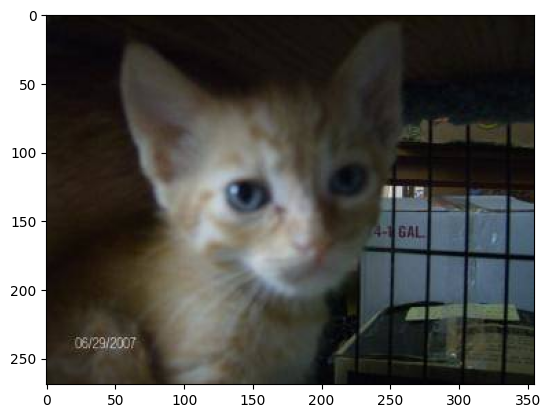

Predicted Label: ['cats']


In [6]:
import cv2
from skimage.feature import hog
from skimage import exposure
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt

def preprocess_image(image_path):

    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = resize(gray_image, (64, 64))

    features, _ = hog(resized_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    features_flatten = features.flatten()

    return features_flatten

image_path = 'C:/Users/Asus/Downloads/Prodigy/3/test/107.jpg'
preprocessed_image = preprocess_image(image_path)
img=imread(image_path)
plt.imshow(img)
plt.show()

reshaped_image = preprocessed_image.reshape(1, -1)

prediction = grid_search.predict(reshaped_image)
print("Predicted Label:", prediction)